In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import lifelines

from google.oauth2 import service_account
key_path = 'artful-logic-320413-845a29caeac9.json'
project_id = 'artful-logic-320413'
credentials = service_account.Credentials.from_service_account_file(key_path)

def select(sql): 
    df = pd.read_gbq(sql, project_id=project_id, credentials=credentials)
    return df

def import_df(name_table):
    df.to_gbq('for_python.{}'.format(name_table), project_id=project_id,
             if_exists='replace')

In [2]:
sql = '''
select * 
from artful-logic-320413.for_python.product_analysis t
limit 10
'''
select(sql)

,order_id,user_id,page_id,product,site_version,time,title,target
0,8f85517967795eeef66c225f7883bdcb,b53b3a3d6ab90ce0268229151c9bde11,39b9475ec3a10d32a4ecf598b26bc6c8,clothes,mobile,2019-02-15 14:13:05+00:00,banner_click,0
1,f74909ace68e51891440e4da0b65a70c,903ce9225fca3e988c2af215d4e544d3,d7a728a67d909e714c0774e22cb806f2,clothes,mobile,2019-01-21 00:31:28+00:00,banner_show,0
2,9e984c108157cea74c894b5cf34efc44,11b921ef080f7736089c757404650e40,98e6f17209029f4ae6dc9d88ec8eac2c,clothes,mobile,2019-01-26 06:32:55+00:00,banner_show,0
3,f4334c131c781e2a6f0a5e34814c8147,8a3363abe792db2d8761d6403605aeb7,62459f4e225e2f4f196c9d42f4ad7111,clothes,mobile,2019-01-03 08:35:56+00:00,banner_show,0
4,656f0dbf9392657eed7feefc486781fb,7810ccd41bf26faaa2c4e1f20db70a71,853bb47a93581ead37b1bcd749d34787,clothes,mobile,2019-02-10 13:38:24+00:00,banner_show,0
5,2c79b73d2716e9470ec621310f08e6fe,44a2e0804995faf8d2e3b084a1e2db1d,1de7d2b90d554be9f0db1c338e80197d,clothes,mobile,2019-01-27 22:17:51+00:00,banner_show,0
6,26901debb30ea03f0aa833c9de6b81e9,feecee9f1643651799ede2740927317a,87867633c2664511065a0586ba2e8a5f,clothes,mobile,2019-01-14 20:15:44+00:00,banner_show,0
7,ba7609ee5789cc4dff171045a693a65f,7989edad14ebcd3adfacc7344dc6b739,f9d396c7f5a391a9251c5fa6d49aa873,clothes,mobile,2019-01-24 06:45:11+00:00,banner_show,0
8,feeef9bd04fac1765263893621bb4811,40c48dab939a482f04dcecde07e27de6,115585e86dd77a339278af96a654d60b,clothes,mobile,2019-03-02 02:54:36+00:00,banner_show,0
9,fe60c129a74980578dc8fb0f8fe39b39,220c77af02f8ad8561b150d93000ddff,a3d2de7675556553a5f08e4c88d2c228,clothes,mobile,2019-01-13 01:44:02+00:00,order,1


In [3]:
sql = '''

with group_user as (
select user_id, sum(target) target_sum
from artful-logic-320413.for_python.product_analysis t
group by user_id
)

select user_id, target_sum
from group_user
order by target_sum desc

limit 10
'''
select(sql)

,user_id,target_sum
0,7176e091ab84e24fcd0fc4ddf721ba1c,6
1,e11b89846de43cdab8f6d334d4cfe10d,5
2,7595dca2546e974b5a40e2a2c6f545ed,5
3,3974f8a7ab9e47320eb046d42b56cdf7,5
4,33d4c93808ed80717d26b77d638a3985,5
5,3f52e83d753bfdb58dfa1bf8da1ff2fd,5
6,89208ae97021c41fcef657cf29ebb014,5
7,6988bcd312727287326c36e724ba2367,5
8,8fb0c8ea08f6cd92c4e73b7ce8b0c375,5
9,c2f8e1260683ddd569afefcb6558a1a6,5


In [4]:
sql = '''
with group_user as (
select user_id, sum(target) target_sum
from artful-logic-320413.for_python.product_analysis t
group by user_id
)

select count(user_id) / (select count(user_id) from group_user)
from group_user
where target_sum > 0

limit 10
'''
select(sql)

,f0_
0,0.055908


          title        f0_
0   banner_show  87.275670
1  banner_click   9.788248
2         order   2.936082


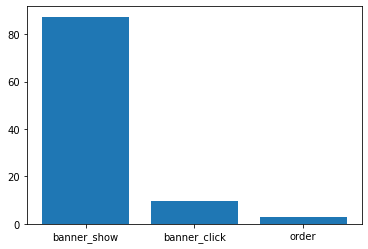

In [5]:
sql = '''
select distinct title, count(target) / (select count(target) from artful-logic-320413.for_python.product_analysis) * 100
from artful-logic-320413.for_python.product_analysis 
group by title
limit 10
'''
df_v = select(sql).sort_values(ascending=False, by='f0_')
plt.bar(df_v.title, df_v['f0_'])
print(df_v)

In [6]:
sql = '''
select page_id, title, target
from artful-logic-320413.for_python.product_analysis 
where user_id = "14b5b3e40460216ea85db56fd5d05aec" 

'''
select(sql)

,page_id,title,target
0,a3d2de7675556553a5f08e4c88d2c228,order,1
1,a3d2de7675556553a5f08e4c88d2c228,order,1
2,8f1ad01757ac2b71d09ab77f0e06b858,banner_show,0
3,4cfd2c50cfd7a983751db088ffbc908c,banner_show,0
4,b5c71b935c6f779ba890870b7e503168,banner_show,0
5,a3d2de7675556553a5f08e4c88d2c228,order,1
6,6122b7b28b9375d5c1764e3c72d85f4e,banner_show,0
7,a3d2de7675556553a5f08e4c88d2c228,order,1
8,39349c48569b3a862c9e2bfe684e508d,banner_show,0
9,3865a284dc88536c178af06e556c2e2d,banner_show,0


In [7]:
#У нас 1 страница заказа
sql = '''
select count(distinct page_id)
from artful-logic-320413.for_python.product_analysis 
where title = "banner_click"

limit 10
'''
select(sql)

,f0_
0,829184


In [8]:
#Удалю этот бессмысленный столбец
sql = '''
select count(order_id) / (select count(*) from artful-logic-320413.for_python.product_analysis)
from artful-logic-320413.for_python.product_analysis 
limit 10
'''
select(sql)

,f0_
0,1.0


Я разобью датасет на 4 части:
  1. Увидевшие баннер, но не кликнувшие
  2. Кликнувшие, но не купившие
  3. Купившие и кликнувшие на банер
  4. Купившие без кликов - постоянные клиенты, как я подозреваю

In [9]:
sql = '''
select count(user_id)
from artful-logic-320413.for_python.product_analysis
where title in ("banner_show") and title not in ("banner_click", "order")
limit 10
'''
select(sql)

,f0_
0,7393314


In [10]:
sql = '''
select count(user_id)
from artful-logic-320413.for_python.product_analysis
where title in ("order") and title not in ("banner_show", "banner_click")
limit 10
'''
select(sql)

,f0_
0,248722


In [11]:
sql = '''
select count(user_id)
from artful-logic-320413.for_python.product_analysis
where title in ("banner_show","banner_click") and title not in ( "order")
limit 10
'''
select(sql)

,f0_
0,8222498


In [12]:
sql = '''
select count(user_id)
from artful-logic-320413.for_python.product_analysis
where title = "banner_show" and title = "banner_click" and title =  "order"
limit 10
'''
select(sql)

,f0_
0,0


## 2. RFM 

Первая модель, которую я применю для сегментирования клиентов - это RFM. Она хорошо себя зарекомендовала. Не смотря на то, что она обоснованна по большей части эмперически и использует ограниченное количество фичей. 
##### Состав модели:
* Recency (Давность сделки). Сколько времени (часов, дней, недель, месяцев) прошло с момента последней покупки клиента.
* Frequency (Частота сделки). Как часто потребитель совершает покупки или другие целевые действия.
* Monetary (Вложения). Сколько средств/ресурсов потратил клиент за определенный промежуток времени. Этот показатель необязательно измерять в деньгах. Например, некоторые маркетологи оценивают время нахождения на сайте, количество переходов по внутренним страницам и т.п.

Последовательность дейсвий:
1. Кластерезировать клиентов по каждой состовляющей модели(R, F, M) - дабы эффективней определить промежутки разделения
2. Объеденить кластеры в одну RFM модель
3. Сегментировать клиентов

In [13]:
sql = '''
with date_max as (
select user_id, max(date(time)) as date
from artful-logic-320413.for_python.product_analysis
where target = 1
group by user_id
)

select user_id, extract(day from (select max(date) from date_max) - date)
from date_max
'''
r = select(sql)

In [14]:
sql = '''
select user_id, sum(target)
from artful-logic-320413.for_python.product_analysis
where target = 1
group by user_id
'''
f = select(sql)

In [15]:
#Так как прямых затрат у меня нет, я буду считать за затраты - количество показов банера на клиента. 
#Это действие исходит из предположения, что
sql = '''
select user_id, count(title)
from artful-logic-320413.for_python.product_analysis
where title = "banner_show"
group by user_id
'''
m = select(sql)

In [16]:
rfm = (r.merge(f, how='left', on='user_id')).merge(m, how='left', on='user_id')
rfm.index = rfm.user_id
rfm = rfm.drop('user_id', axis=1)
rfm.columns = ['r', 'f', 'm']
rfm.fillna(0, inplace=True)
rfm

,r,f,m
user_id,,,
56e6644b96420954e4c775ba641f434f,133,1,1
7a88a171bd1f06b5bd166a003db43898,137,1,3
286face921923c2b81566a8e6a96f265,148,1,2
5c8eef921c27272145e4164ac0b4c1c7,143,1,5
f9e0c0d301166a4361e6fa5c849a9538,140,1,1
...,...,...,...
e99eb471887a1e0d5187f53233d95c9e,130,1,7
4fef16b038bf858c72de7a175d700da6,130,1,1
d9229e27b70eee9c8663f3c2e0ac1e1b,130,1,2


In [18]:
#3 - лучшее
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaler = scaler.fit_transform(rfm[:100000])
avg = []
ssd = []
for i in range(2, 10):
    Kmeans = KMeans(n_clusters=i, random_state=42, max_iter=60)
    Kmeans.fit(rfm_scaler)
    y_labels = Kmeans.labels_
    
    silhouette_avg = silhouette_score(rfm_scaler, y_labels)
    
    avg.append(silhouette_avg)
    ssd.append(Kmeans.inertia_)
    
pd.DataFrame(avg, columns=['silhouette'])

,silhouette
0,0.686926
1,0.644915
2,0.675604
3,0.559348
4,0.632045
5,0.513628
6,0.546707
7,0.540010


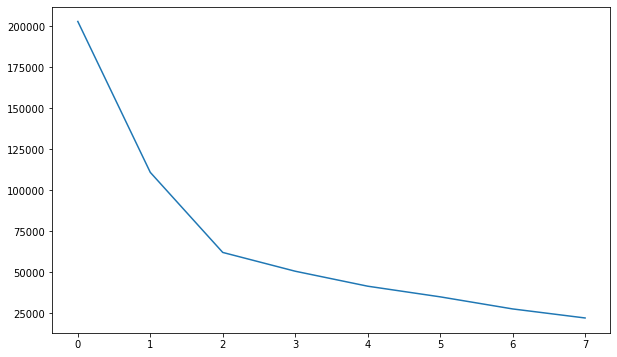

In [19]:
ssd = pd.DataFrame(ssd, columns=['SSD'])
#Возьмём 3 кластера
plt.figure(figsize=(10,6))
plt.plot(ssd)

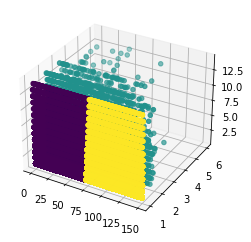

In [20]:
scaler = StandardScaler()
rfm_scaler = scaler.fit_transform(rfm)
Kmeans = KMeans(n_clusters=3, random_state=42, max_iter=60)
Kmeans.fit(rfm_scaler)
y_labels = Kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['r'], rfm['f'], rfm['m'], c=y_labels)

In [21]:
rfm_kmeans = rfm.copy()
rfm_kmeans['Cluster'] = y_labels
rfm_kmeans['Cluster'] = rfm_kmeans['Cluster'].astype('object')
rfm_kmeans

,r,f,m,Cluster
user_id,,,,
56e6644b96420954e4c775ba641f434f,133,1,1,2
7a88a171bd1f06b5bd166a003db43898,137,1,3,2
286face921923c2b81566a8e6a96f265,148,1,2,2
5c8eef921c27272145e4164ac0b4c1c7,143,1,5,2
f9e0c0d301166a4361e6fa5c849a9538,140,1,1,2
...,...,...,...,...
e99eb471887a1e0d5187f53233d95c9e,130,1,7,2
4fef16b038bf858c72de7a175d700da6,130,1,1,2
d9229e27b70eee9c8663f3c2e0ac1e1b,130,1,2,2


In [22]:
rfm_kmeans['Cluster'].value_counts()

0    127317
2    100548
1     10001
Name: Cluster, dtype: int64

In [23]:
for i in range(3):
    vis_cluster = rfm_kmeans[rfm_kmeans['Cluster'] == i]
    print("Сводная статистика для кластера {}: \n".format(i), vis_cluster.describe(), "\n\n")

Сводная статистика для кластера 0: 
                    r         f              m
count  127317.000000  127317.0  127317.000000
mean       37.920364       1.0       2.533888
std        19.974065       0.0       2.113090
min         0.000000       1.0       1.000000
25%        22.000000       1.0       1.000000
50%        38.000000       1.0       2.000000
75%        55.000000       1.0       3.000000
max        78.000000       1.0      14.000000 


Сводная статистика для кластера 1: 
                   r             f             m
count  10001.000000  10001.000000  10001.000000
mean      54.932407      2.085491      4.911909
std       36.088287      0.320921      3.133519
min        0.000000      2.000000      1.000000
25%       25.000000      2.000000      3.000000
50%       49.000000      2.000000      4.000000
75%       83.000000      2.000000      7.000000
max      150.000000      6.000000     14.000000 


Сводная статистика для кластера 2: 
                    r         f       

Получили довольно не плохую сегментацию. Далее интересно узнать какие кластеры дольше живут. Но перед этим смоделирую вероятность покупки на 5-ий месяц клиентом, если имеются данные за 4 прошлых

## 3. Предсказание предрасположенности к покупке на основе поведенческой модели

#### Цель - зная то, как в прошлые месяцы человек взаимодествовал с рекламой, какими категориями интересовался и в каком объёме - определить вероятность того, что он купит в следующем месяце. В данном случае в пятом.

In [24]:
sql = '''
select * 
from artful-logic-320413.for_python.product_analysis
order by rand()
'''
df = select(sql)

In [25]:
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,be495cc77d1c1c06b4d1495d06a4aaff,cdb52b92d62aaf0b792e07091a80e16b,09182d40825a1bde832a27556271b265,sneakers,desktop,2019-05-03 10:11:04+00:00,banner_show,0
1,89de5bfea700a51f8f0036302e2ab05c,1da4862c560b0022ad0d26831eaacd3b,35d39db57377ee68b14dd4bea093300e,sneakers,desktop,2019-04-08 14:07:59+00:00,banner_show,0
2,dbaed724c16d4cd67e2d4d698af64153,7e2a8659e2e6d812df918aab9770856b,62f700da2795347da0fcb664255749c5,accessories,desktop,2019-05-12 08:41:35+00:00,banner_show,0
3,8c55536bbe1690257b7772e2b1c0a082,61aeca91d2ffa4fc97891d7bd9ceb88e,0c78442457d3a92513b3707ecedfea17,accessories,mobile,2019-05-28 15:47:20+00:00,banner_click,0
4,8dde157a2f67c34efef70118b84b07b2,a7c9cb964cb27ac7983327f7ab3cd3fe,e2fbdeb89989ecd1c3b0779d0315386d,company,mobile,2019-05-11 15:18:36+00:00,banner_click,0


In [26]:
df['product'].value_counts()

clothes             1786438
company             1725056
sneakers            1703342
sports_nutrition    1634625
accessories         1621759
Name: product, dtype: int64

In [27]:
df['month'] = df['time'].dt.month
df_p = pd.get_dummies(df, columns=['product', 'title'], drop_first=True).drop('order_id', axis=1)
df_p

,user_id,page_id,site_version,time,target,month,product_clothes,product_company,product_sneakers,product_sports_nutrition,title_banner_show,title_order
0,cdb52b92d62aaf0b792e07091a80e16b,09182d40825a1bde832a27556271b265,desktop,2019-05-03 10:11:04+00:00,0,5,0,0,1,0,1,0
1,1da4862c560b0022ad0d26831eaacd3b,35d39db57377ee68b14dd4bea093300e,desktop,2019-04-08 14:07:59+00:00,0,4,0,0,1,0,1,0
2,7e2a8659e2e6d812df918aab9770856b,62f700da2795347da0fcb664255749c5,desktop,2019-05-12 08:41:35+00:00,0,5,0,0,0,0,1,0
3,61aeca91d2ffa4fc97891d7bd9ceb88e,0c78442457d3a92513b3707ecedfea17,mobile,2019-05-28 15:47:20+00:00,0,5,0,0,0,0,0,0
4,a7c9cb964cb27ac7983327f7ab3cd3fe,e2fbdeb89989ecd1c3b0779d0315386d,mobile,2019-05-11 15:18:36+00:00,0,5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8471215,06cc493f1c85c2b7f76c0f5de9afac29,0f0c3699f50a1ec9ddda918a96ae2268,mobile,2019-03-31 02:43:58+00:00,0,3,1,0,0,0,1,0
8471216,58fd404b12ed3c46ab65a8384406b9f6,a3d2de7675556553a5f08e4c88d2c228,desktop,2019-05-07 13:46:46+00:00,1,5,1,0,0,0,0,1
8471217,754761e1571861c9587c083135ff540d,a3d2de7675556553a5f08e4c88d2c228,desktop,2019-02-25 13:40:23+00:00,1,2,1,0,0,0,0,1
8471218,d110f05c8be3d50a263c29900a9a0ac1,a3d2de7675556553a5f08e4c88d2c228,desktop,2019-03-29 06:21:02+00:00,1,3,1,0,0,0,0,1


In [28]:
def get_pivot(df, column_name, agg_func):   
    col_name = ['month_{}_{}'.format(column_name, i) for i in range(1, 5+1)]
    pivooot = df.pivot_table(index='user_id', columns='month',
                            values=[column_name], aggfunc=agg_func).fillna(0)
    pivooot.columns = col_name
    return pivooot

pivot_clothes = get_pivot(df_p, 'product_clothes', 'sum')
pivot_company = get_pivot(df_p, 'product_company', 'sum')
pivot_sneakers = get_pivot(df_p, 'product_sneakers', 'sum')
pivot_nutrition = get_pivot(df_p, 'product_sports_nutrition', 'sum')
pivot_banner_show = get_pivot(df_p, 'title_banner_show', 'sum')
pivot_target = get_pivot(df_p, 'target', 'sum')

In [29]:
dat_j = pd.concat([pivot_clothes, pivot_company, pivot_sneakers,
                  pivot_nutrition, pivot_banner_show, pivot_target], axis=1)
df_purchase = dat_j.drop(['month_title_banner_show_5', 'month_product_company_5', 'month_product_sneakers_5',
           'month_product_sports_nutrition_5', 'month_title_banner_show_5'], axis=1)

In [30]:
df_purchase

,month_product_clothes_1,month_product_clothes_2,month_product_clothes_3,month_product_clothes_4,month_product_clothes_5,month_product_company_1,month_product_company_2,month_product_company_3,month_product_company_4,month_product_sneakers_1,...,month_product_sports_nutrition_4,month_title_banner_show_1,month_title_banner_show_2,month_title_banner_show_3,month_title_banner_show_4,month_target_1,month_target_2,month_target_3,month_target_4,month_target_5
user_id,,,,,,,,,,,,,,,,,,,,,
0000023f507999464aa2b78875b7e5d6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000009891526c0ade7180f8423792063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000ce845c00cbf0686c992fc369df4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
00000f7264c27ba6fea0c837ed6aa0aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000104cd168386a335ba6bf6e32219d,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffe3323c6b5c056c19b2722c9aacbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fffff8d603b897bb8655858430adfe40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fffff9055756ed29a5aa13ee8e222ac8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def to_binary(x):
    if x == 0:
        return 0
    else:
        return 1
y = df_purchase['month_target_5'].apply(to_binary)
x = df_purchase.drop('month_target_5', axis=1)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
logsv = LogisticRegressionCV(cv=5)
logsv.fit(X_train, y_train)
pred = logsv.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    850683
           1       0.00      0.20      0.01       241

    accuracy                           0.99    850924
   macro avg       0.50      0.59      0.50    850924
weighted avg       1.00      0.99      0.99    850924



In [34]:
y_test.value_counts()

0    840793
1     10131
Name: month_target_5, dtype: int64

## 4. Анализ выживаемости Кокса

In [35]:
from lifelines import CoxPHFitter

In [36]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter
rossi = load_rossi()
cph = CoxPHFitter(penalizer=0.1)

In [37]:
a = df[(df['title']=='order') | (df['title'] == 'banner_click')].groupby('user_id')['time'].max()

In [38]:
b = df[(df['title']=='order') | (df['title'] == 'banner_click')].groupby('user_id')['time'].min()

In [39]:
df_purchase['chur'] = (a - b).dt.days
df_purchase['chur'] = df_purchase['chur'].fillna(0)
df_koks = df_purchase[df_purchase['chur'] > 0].drop('month_product_clothes_5', axis=1).merge(rfm_kmeans['Cluster'], how='left', on='user_id')

In [40]:
print(df_koks.shape)
df_koks = df_koks.dropna()

(164742, 27)


In [41]:
cph.fit(df_koks, 'chur', 'month_target_5')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 111970 total observations, 87140 right-censored observations>
             duration col = 'chur'
                event col = 'month_target_5'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 111970
number of events observed = 24830
   partial log-likelihood = -240719.97
         time fit was run = 2021-08-14 18:15:33 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
month_product_clothes_1           -0.26       0.77       0.01            -0.28            -0.24                 0.76                 0.79
month_product_clothes_2           -0.26       0.77       0.01            -0.28            -0.24                 0.75                 0.79
month_product_clothes_3           -0.27       0.77       0.01            -0.28            -0.25                 0.75                 0.78
month_product_clothes_4           -0.14       0.87       0.01            -0.15            -0.13                 0.86                 0.88
month_product_company_1           -0.24       0.79       0.01            -0.26            -0.21                 0.77                 0.81
month_product_company_2           -0.21       0.81       0.01            -0.23            -0.18                 0.80                 0.83
month_product_company_3           -0.20       0.82       0.01            -0.22            -0.18                 0.80                 0.84
month_product_company_4           -0.08       0.92       0.01            -0.09            -0.06                 0.91                 0.94
month_product_sneakers_1          -0.25       0.78       0.01            -0.28            -0.23                 0.76                 0.80
month_product_sneakers_2          -0.23       0.79       0.01            -0.26            -0.21                 0.77                 0.81
month_product_sneakers_3          -0.24       0.79       0.01            -0.26            -0.22                 0.77                 0.80
month_product_sneakers_4          -0.12       0.88       0.01            -0.14            -0.11                 0.87                 0.90
month_product_sports_nutrition_1  -0.23       0.80       0.01            -0.25            -0.20                 0.78                 0.82
month_product_sports_nutrition_2  -0.23       0.80       0.01            -0.26            -0.20                 0.77                 0.82
month_product_sports_nutrition_3  -0.21       0.81       0.01            -0.24            -0.19                 0.79                 0.83
month_product_sports_nutrition_4  -0.11       0.90       0.01            -0.12            -0.09                 0.89                 0.91
month_title_banner_show_1         -0.17       0.85       0.01            -0.18            -0.15                 0.84                 0.86
month_title_banner_show_2         -0.15       0.86       0.01            -0.17            -0.14                 0.85                 0.87
month_title_banner_show_3         -0.13       0.87       0.01            -0.15            -0.12                 0.86                 0.89
month_title_banner_show_4         -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
month_target_1                    -0.67       0.51       0.02            -0.71            -0.63                 0.49                 0.53
month_target_2                    -0.71       0.49       0.02            -0.74            -0.67                 0.47                 0.51
month_target_3                    -0.99       0.37       0.02            -1.02            -0.96                 0.36                 0.38
month_target_4                    -1.29       0.27       0.01            -1.32            -1.27            

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

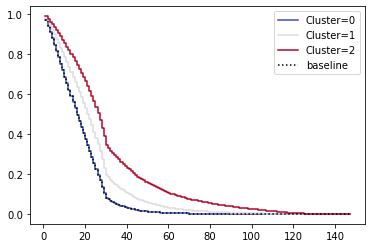

In [42]:
#Клиенты из 2-го кластра - долгожители.
plt.figure(figsize=(10,10))
cph.plot_partial_effects_on_outcome('Cluster', values=range(0, 3), cmap='coolwarm')